CAT ML Model

 window = 100
 epoch = 20
 batch = 100
 dropout = .02

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import requests

%matplotlib inline

In [2]:
!pwd

/Users/josephbarry/Desktop/FinTech_Class/Project_2/supreme-broccoli/notebooks/JB_scratchwork/Final_Models/ML_Stock_Predictions


In [3]:
csvpath = Path("CAT_nasdaqdata.csv")

cat_df = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
cat_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-06,$213.52,4348120,$217.41,$217.56,$211.34
2021-07-02,$217.76,2434363,$217.66,$218.37,$215.58
2021-07-01,$216.71,2426331,$219.16,$219.79,$216.15
2021-06-30,$217.63,3249543,$214.62,$217.95,$214.06
2021-06-29,$215.10,3443372,$218.04,$218.70,$214.59


In [5]:
cat_df.sort_index(ascending=True, inplace=True)

In [6]:
cat_df = cat_df.rename(columns={"Close/Last": "Close"})

In [7]:
cat_df = cat_df[['Close']]
cat_df

,Close
Date,
2011-07-06,$110.08
2011-07-07,$111.63
2011-07-08,$110.41
2011-07-11,$108.16
2011-07-12,$106.93
...,...
2021-06-29,$215.10
2021-06-30,$217.63
2021-07-01,$216.71


In [8]:
cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)

<ipython-input-8-98ee503b25f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)


In [9]:
cat_df

,Close
Date,
2011-07-06,110.08
2011-07-07,111.63
2011-07-08,110.41
2011-07-11,108.16
2011-07-12,106.93
...,...
2021-06-29,215.10
2021-06-30,217.63
2021-07-01,216.71


In [10]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window- 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [11]:
window_size = 100
feature_column = 0 # why 0?
target_column = 0 # Why 0?

X, y = window_data(cat_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[110.08 111.63 110.41 108.16 106.93 108.64 107.58 109.36 107.8  109.64
  110.31 111.6  105.15 105.66 105.2  101.34  99.64  98.79 100.72  97.18
   96.28  89.55  90.99  82.6   87.48  83.51  87.25  89.81  91.37  89.35
   87.64  83.33  79.97  79.89  82.98  85.4   83.25  85.16  88.15  89.83
   91.    88.55  85.38  85.7   88.69  87.04  83.96  83.87  85.02  85.45
   86.6   85.9   84.6   83.66  79.36  73.9   73.86  76.85  77.67  75.08
   75.39  73.84  70.55  72.54  74.26  77.09  75.52  79.13  80.66  81.7
   81.44  84.09  81.52  84.72  83.56  84.26  87.39  91.77  89.89  91.57
   96.33  96.85  94.46  91.63  93.94  96.    95.74  95.    95.89  91.64
   92.2   96.13  96.53  97.07  95.75  93.81  93.93  91.12  89.99  87.76]
 [111.63 110.41 108.16 106.93 108.64 107.58 109.36 107.8  109.64 110.31
  111.6  105.15 105.66 105.2  101.34  99.64  98.79 100.72  97.18  96.28
   89.55  90.99  82.6   87.48  83.51  87.25  89.81  91.37  89.35  87.64
   83.33  79.97  79.89  82.98  85.4   83.25  85

In [12]:
split = int(0.6 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [13]:
y_train

array([[ 86.72],
       [ 91.48],
       [ 90.54],
       ...,
       [115.35],
       [115.07],
       [116.01]])

In [15]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

x_train_scaler = MinMaxScaler()
#x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
#y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
#x_test_scaler.fit(X_test)
#y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_train_scaler.transform(X_test)
y_test = y_train_scaler.transform(y_test)

In [16]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [18]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = window_size
# 20% of neurons to be dropped out
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [19]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [20]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=100, verbose=1)

Epoch 1/20
15/15 [==============================] - 1s 76ms/step - loss: 0.1924
Epoch 2/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0325
Epoch 3/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0282
Epoch 4/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0151
Epoch 5/20
15/15 [==============================] - 1s 95ms/step - loss: 0.0095
Epoch 6/20
15/15 [==============================] - 1s 97ms/step - loss: 0.0091
Epoch 7/20
15/15 [==============================] - 1s 78ms/step - loss: 0.0111
Epoch 8/20
15/15 [==============================] - 1s 73ms/step - loss: 0.0150
Epoch 9/20
15/15 [==============================] - 1s 74ms/step - loss: 0.0175
Epoch 10/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0140
Epoch 11/20
15/15 [==============================] - 1s 77ms/step - loss: 0.0075
Epoch 12/20
15/15 [==============================] - 1s 74ms/step - loss: 0.0080
Epoch 13/20
15/15 [==================

In [21]:
model.evaluate(X_test, y_test, verbose=0)

0.17672023177146912

In [22]:
predicted = model.predict(X_test)

In [23]:
predicted_prices = y_train_scaler.inverse_transform(predicted)

In [24]:
real_prices = y_train_scaler.inverse_transform(y_test.reshape(-1,1))

In [25]:
cat_actual_predicted = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = cat_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
cat_actual_predicted.head()

,Actual,Predicted
Date,,
2017-08-31,117.55,108.152832
2017-09-01,117.49,108.336411
2017-09-05,118.28,108.566872
2017-09-06,118.30,108.846191
2017-09-07,116.98,109.159241


In [26]:
cat_actual_predicted.tail()

,Actual,Predicted
Date,,
2021-06-29,216.27,165.633316
2021-06-30,215.10,165.417419
2021-07-01,217.63,165.262131
2021-07-02,216.71,165.183273
2021-07-06,217.76,165.151260


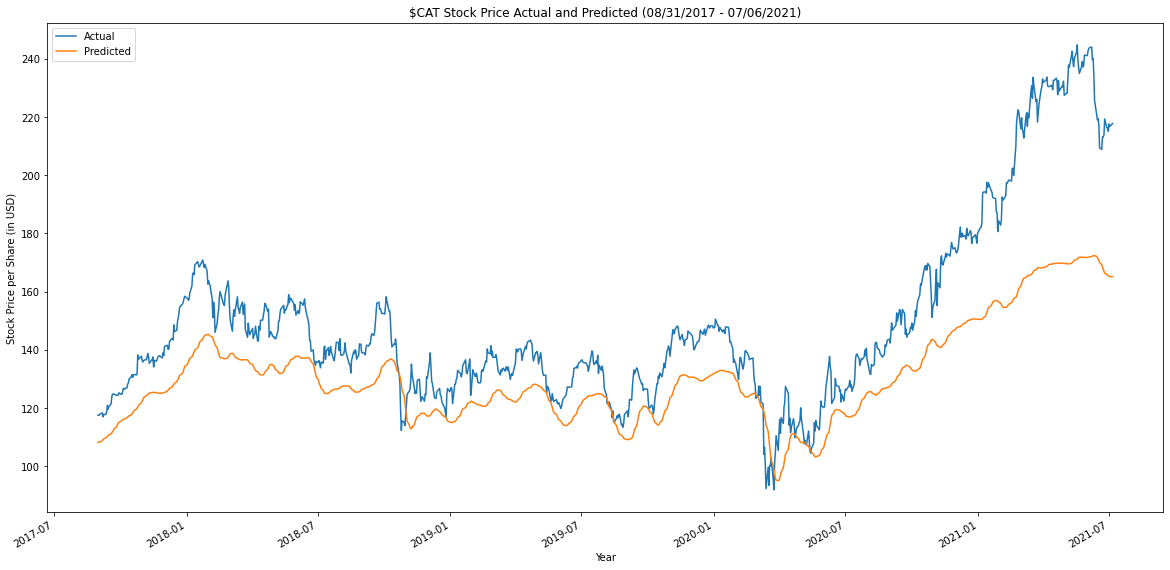

In [27]:
cat_actual_predicted.plot(figsize=(20,10))
plt.title('$CAT Stock Price Actual and Predicted (08/31/2017 - 07/06/2021)')
plt.xlabel('Year')
plt.ylabel('Stock Price per Share (in USD)')
plt.legend(loc="best")
plt.show()